In [1]:
import pandas as pd

df = pd.read_csv('data/Tweets.csv')

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
df.shape

(14640, 15)

In [3]:
# resize dataset
df_resize = df.iloc[:1000]
df_resize.shape

(1000, 15)

In [4]:
# remove neutral tweets
df_resize = df_resize[df_resize['airline_sentiment'] != 'neutral']

In [5]:
df_resize.shape

(728, 15)

In [6]:
df_resize.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [7]:
# tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()

list_tokens = list()
for line in lines:
    line = line.replace("@VirginAmerica","")
    line = line.replace("@united","")
    tokens = word_tokenize(line)
    list_tokens.append(tokens)

[nltk_data] Downloading package punkt to /home/aliif/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
list_tokens[103]

['having',
 'problems',
 'Flight',
 'Booking',
 'Problems',
 'on',
 'the',
 'web',
 'site',
 '.',
 'keeps',
 'giving',
 'me',
 'an',
 'error',
 'and',
 'to',
 'contact',
 'by',
 'phone',
 '.',
 'phone',
 'is',
 '30',
 'minute',
 'wait',
 '.']

In [9]:
# tokenization, remove stopwords, and stemming
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()
list_tokens_stem = list()
porter = PorterStemmer()
for line in lines:
    line = line.replace("@VirginAmerica","")
    line = line.replace("@united","")
    tokens = word_tokenize(line)
    # merubah tokens menjadi huruf kecil semua
    tokens = [w.lower() for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    # menghapus stop words
    tokens = [word for word in tokens if not word in stopwords.words()]
    # melakukan stemming
    tokens = [porter.stem(word) for word in tokens]
    list_tokens_stem.append(tokens)

[nltk_data] Downloading package punkt to /home/aliif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/aliif/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
print(lines[103])
print(list_tokens_stem[103])

@VirginAmerica having problems Flight Booking Problems on the web site. keeps giving me an error and to contact by phone.  phone is 30 minute wait.
['problem', 'flight', 'book', 'problem', 'web', 'site', 'give', 'error', 'contact', 'phone', 'phone', 'minut', 'wait']


In [11]:
# removing stopwords + lemmatization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()
list_tokens_lemma = list()
#porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()
for line in lines:
    line = line.replace("@VirginAmerica","")
    line = line.replace("@united","")
    tokens = word_tokenize(line)
    # merubah tokens menjadi huruf kecil semua
    tokens = [w.lower() for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    # menghapus stop words
    tokens = [word for word in tokens if not word in stopwords.words()]
    # melakukan stemming
    #tokens = [porter.stem(word) for word in tokens]
    # melakukan lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    list_tokens_lemma.append(tokens)

[nltk_data] Downloading package punkt to /home/aliif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/aliif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aliif/nltk_data...


In [14]:
list_tokens_lemma[103]

['problem',
 'flight',
 'booking',
 'problem',
 'web',
 'site',
 'giving',
 'error',
 'contact',
 'phone',
 'phone',
 'minute',
 'wait']

# Feature Extraction

In [15]:
# bow (bag of words)
from sklearn.feature_extraction.text import CountVectorizer

new_doc = list()
# ambil hasil dari lemmatization misalnya
for doc in list_tokens_lemma:
    new_doc.append(' '.join(doc))
    
vectorizer = CountVectorizer(max_features=1000)
x_input_bow = vectorizer.fit_transform(new_doc)

In [16]:
list_tokens_lemma[:10]

[['added', 'commercial', 'experience', 'tacky'],
 ['aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guest',
  'face',
  'amp',
  'recourse'],
 ['big'],
 ['pay', 'flight', 'seat', 'playing', 'flying'],
 ['time', 'fly', 'vx', 'ear', 'worm', 'away'],
 ['virginamerica'],
 ['amazing', 'arrived', 'hour', 'early'],
 ['lt', 'pretty', 'graphic', 'minimal', 'iconography'],
 ['great', 'deal', 'trip', 'australia', 'amp', 'trip', 'p'],
 ['virginmedia',
  'flying',
  'fabulous',
  'seductive',
  'sky',
  'stress',
  'away',
  'travel',
  'http']]

In [17]:
new_doc[:10]

['added commercial experience tacky',
 'aggressive blast obnoxious entertainment guest face amp recourse',
 'big',
 'pay flight seat playing flying',
 'time fly vx ear worm away',
 'virginamerica',
 'amazing arrived hour early',
 'lt pretty graphic minimal iconography',
 'great deal trip australia amp trip p',
 'virginmedia flying fabulous seductive sky stress away travel http']

In [18]:
print(vectorizer.get_feature_names_out())
print(x_input_bow.toarray())
print(vectorizer.vocabulary_)
print(x_input_bow.shape)

['ability' 'absolute' 'absolutely' 'absurd' 'abt' 'abundance' 'accelerate'
 'accept' 'access' 'accident' 'accompany' 'account' 'accountable' 'acosta'
 'action' 'active' 'actual' 'add' 'added' 'adding' 'addition' 'additional'
 'address' 'addtl' 'adjacent' 'adore' 'advance' 'adventure' 'advise'
 'advising' 'aegeanairlines' 'affected' 'afford' 'agent' 'ago' 'ahead'
 'air' 'aircraft' 'airline' 'airport' 'amazing' 'america' 'americanair'
 'amp' 'angry' 'answer' 'answering' 'anxiety' 'apology' 'app' 'apparently'
 'applied' 'appreciate' 'appropriate' 'arrived' 'arrives' 'arriving'
 'asap' 'ase' 'asked' 'assist' 'assistance' 'atrocious' 'attendant'
 'austin' 'avail' 'available' 'aviv' 'award' 'away' 'awesome' 'back' 'bag'
 'baggage' 'bank' 'bday' 'big' 'bin' 'birthday' 'bit' 'board' 'boarded'
 'boarding' 'book' 'booked' 'booking' 'bos' 'boston' 'bought' 'brand'
 'break' 'broken' 'browser' 'bug' 'business' 'button' 'buy' 'cabin' 'cake'
 'call' 'called' 'calling' 'cancelled' 'captain' 'car' 'car

In [19]:
# TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

new_doc = list()

for doc in list_tokens_lemma:
    new_doc.append(' '.join(doc))
    
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_input_tfidf = tfidf_vectorizer.fit_transform(new_doc)

In [20]:
print(tfidf_vectorizer.get_feature_names_out())
print(X_input_tfidf.toarray())
print(tfidf_vectorizer.vocabulary_)
print(X_input_tfidf.shape)

['ability' 'absolute' 'absolutely' 'absurd' 'abt' 'abundance' 'accelerate'
 'accept' 'access' 'accident' 'accompany' 'account' 'accountable' 'acosta'
 'action' 'active' 'actual' 'add' 'added' 'adding' 'addition' 'additional'
 'address' 'addtl' 'adjacent' 'adore' 'advance' 'adventure' 'advise'
 'advising' 'aegeanairlines' 'affected' 'afford' 'agent' 'ago' 'ahead'
 'air' 'aircraft' 'airline' 'airport' 'amazing' 'america' 'americanair'
 'amp' 'angry' 'answer' 'answering' 'anxiety' 'apology' 'app' 'apparently'
 'applied' 'appreciate' 'appropriate' 'arrived' 'arrives' 'arriving'
 'asap' 'ase' 'asked' 'assist' 'assistance' 'atrocious' 'attendant'
 'austin' 'avail' 'available' 'aviv' 'award' 'away' 'awesome' 'back' 'bag'
 'baggage' 'bank' 'bday' 'big' 'bin' 'birthday' 'bit' 'board' 'boarded'
 'boarding' 'book' 'booked' 'booking' 'bos' 'boston' 'bought' 'brand'
 'break' 'broken' 'browser' 'bug' 'business' 'button' 'buy' 'cabin' 'cake'
 'call' 'called' 'calling' 'cancelled' 'captain' 'car' 'car

# Classification Models

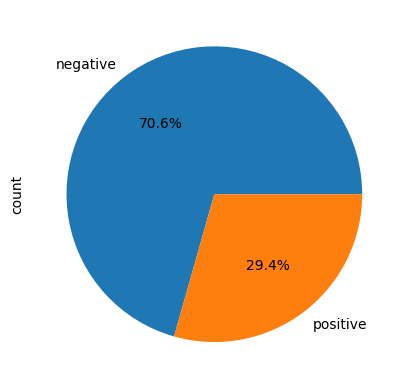

In [21]:
import matplotlib.pyplot as plt

data = df_resize['airline_sentiment'].value_counts()
data.plot(kind='pie', autopct='%1.1f%%')
plt.show()

Accuracy:  0.8447488584474886
Precision:  0.820440251572327
Recall:  0.8027332144979205
Confusion Matrix:  [[139  14]
 [ 20  46]]
F1 Score:  0.8105921855921856


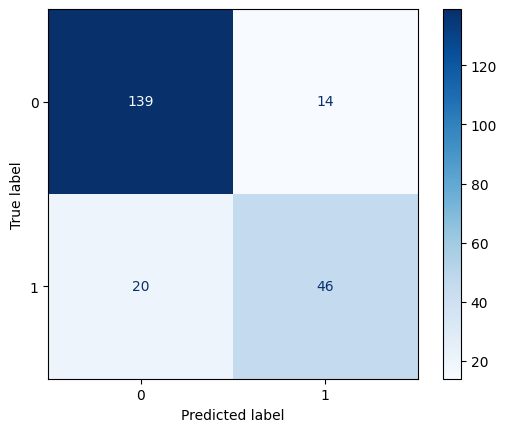

In [24]:
# multi layer perceptron + bow (bag of words)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import numpy as np

#get X and y
df_X = x_input_bow
df_y = df_resize['airline_sentiment']

# hold out 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

# label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# start learning
model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

from sklearn.metrics import f1_score

print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

In [25]:
df_X.shape

(728, 1000)

Accuracy  0.8401826484018264
Precision  0.7627118644067796
Recall  0.6818181818181818
Confusion matrix  [[139  14]
 [ 21  45]]
F1  0.8040894568690096


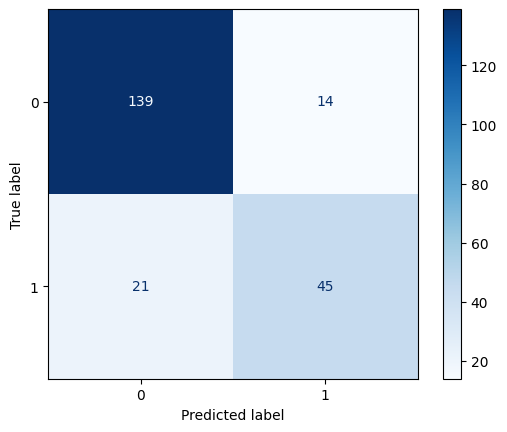

In [26]:
# mlp + tfidf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
# get X and y
df_X = X_input_tfidf
df_y = df_resize['airline_sentiment']
#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)
#mulai learning
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred))
print('Recall ',recall_score(y_test, y_pred))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))

# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

from sklearn.metrics import f1_score
print('F1 ',f1_score(y_test, y_pred, average='macro'))

Accuracy  0.7442922374429224
Precision  0.5581395348837209
Recall  0.7272727272727273
Confusion matrix  [[115  38]
 [ 18  48]]
F1  0.7178873757821126


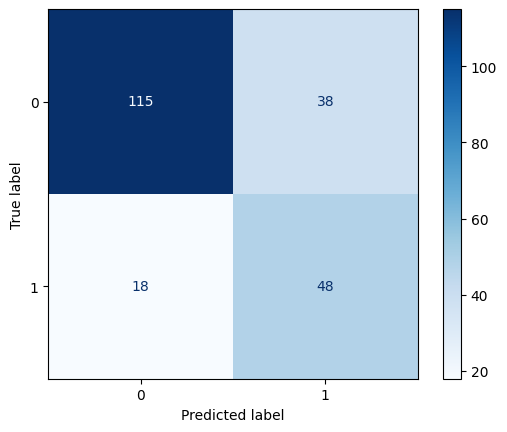

In [27]:
# decision tree + bow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
# get X and y
df_X = x_input_bow
df_y = df_resize['airline_sentiment']
#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)
#mulai learning
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred))
print('Recall ',recall_score(y_test, y_pred))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)
from sklearn.metrics import f1_score
print('F1 ',f1_score(y_test, y_pred, average='macro'))

Accuracy  0.726027397260274
Precision  0.532608695652174
Recall  0.7424242424242424
Confusion matrix  [[110  43]
 [ 17  49]]
F1  0.7029837251356239


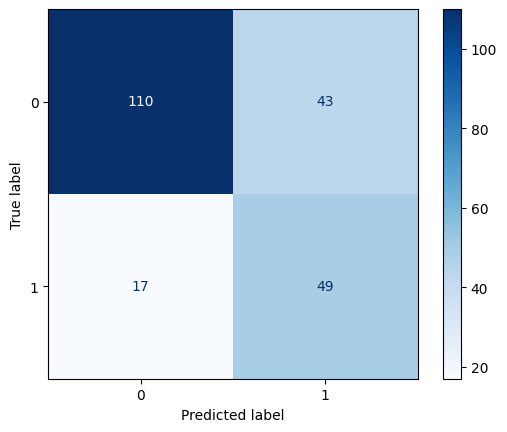

In [29]:
# decision tree + tfidf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
# get X and y
df_X = X_input_tfidf
df_y = df_resize['airline_sentiment']
#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)
#mulai learning
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred))
print('Recall ',recall_score(y_test, y_pred))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)
from sklearn.metrics import f1_score
print('F1 ',f1_score(y_test, y_pred, average='macro'))

# Word Cloud
graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text

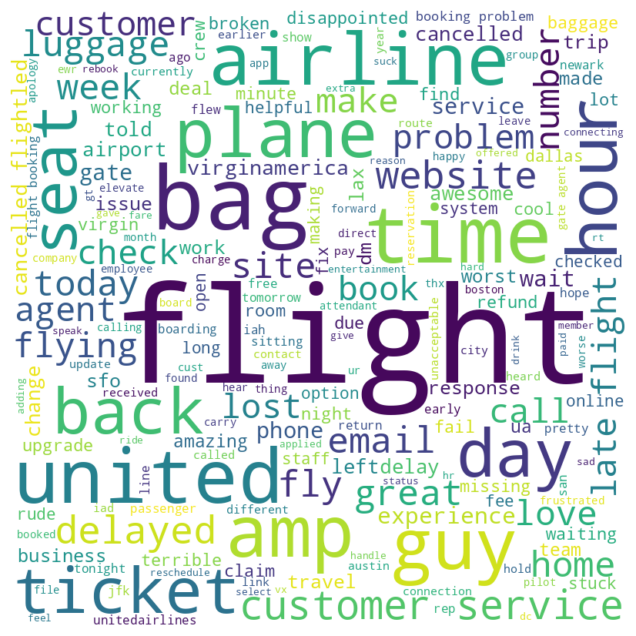

In [33]:
from wordcloud import WordCloud
text = ' '.join(new_doc)
wordcloud = WordCloud(width = 800, height = 800, background_color="white")
wordcloud = wordcloud.generate_from_text(text)
# Display the generated image:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
text

'added commercial experience tacky aggressive blast obnoxious entertainment guest face amp recourse big pay flight seat playing flying time fly vx ear worm away virginamerica amazing arrived hour early lt pretty graphic minimal iconography great deal trip australia amp trip p virginmedia flying fabulous seductive sky stress away travel http  schedule excited cross country flight lax mco heard great thing virgin america flew nyc sfo week fully seat due large gentleman side flying amazingly awesome fly fare time carrier seat available select love graphic http love hipster innovation feel brand guy messed seating reserved seating friend guy gave seat away free internet status match program applied week called emailed response happened ur vegan food option ur site eat hr fail amazing cold air vent noair worstflightever roasted sfotobos bked cool birthday trip add elevate entered middle flight booking problem left expensive headphone flight iad lax today seat answering amp f number lax awai